<a href="https://colab.research.google.com/github/Nolasar/CV-semester-1/blob/main/CV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Template Matching


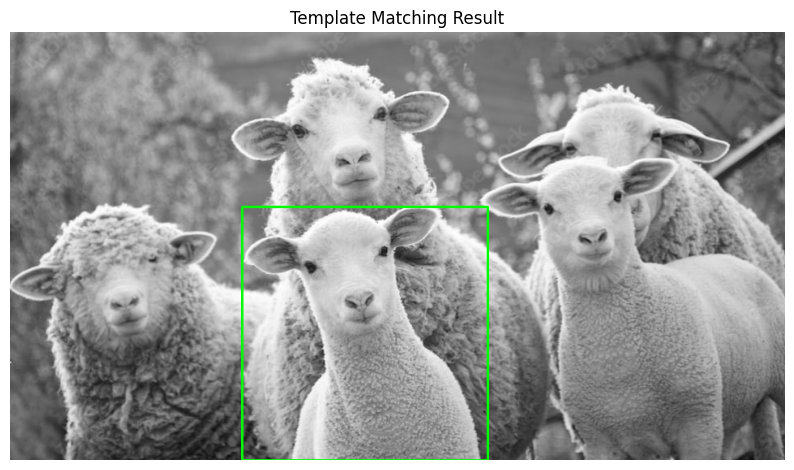

2. SIFT Matching


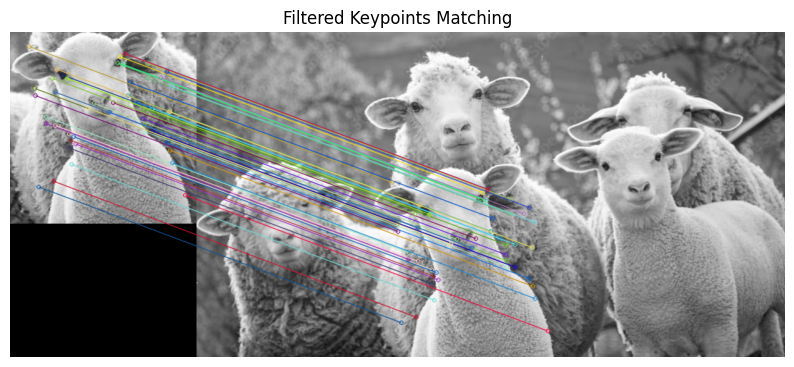

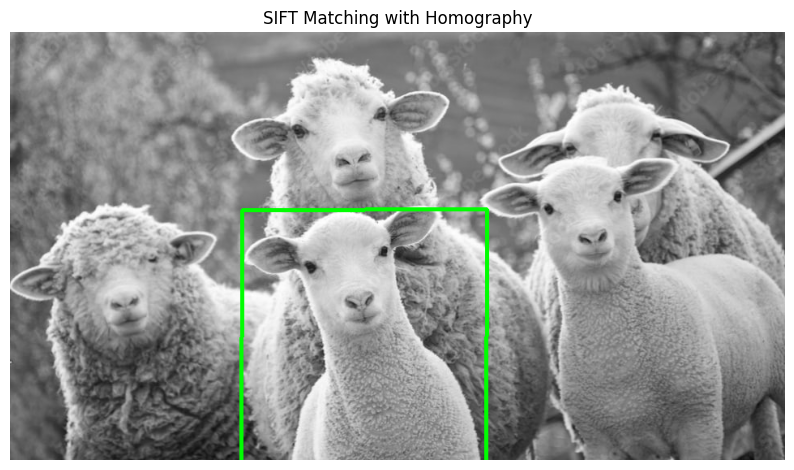

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для визуализации результата
def show_image(title, image):
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Template Matching
def template_matching(template_path, input_path):
    # Загрузка изображений
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    input_img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

    # Прямой поиск шаблона
    result = cv2.matchTemplate(input_img, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Вычисление координат рамки
    h, w = template.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Рисование рамки
    input_img_color = cv2.cvtColor(input_img, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(input_img_color, top_left, bottom_right, (0, 255, 0), 2)

    # Визуализация результата
    show_image("Template Matching Result", input_img_color)

# SIFT Matching
def sift_matching(template_path, input_path):
    # Загрузка изображений
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    input_img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

    # Инициализация SIFT
    sift = cv2.SIFT_create()

    # Поиск ключевых точек и дескрипторов
    kp1, des1 = sift.detectAndCompute(template, None)
    kp2, des2 = sift.detectAndCompute(input_img, None)

    # Сопоставление точек с помощью BFMatcher
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Отфильтровывание "хороших" совпадений
    good_matches = []
    for m, n in matches:
        if m.distance < 0.6 * n.distance:  # Более строгий порог
            good_matches.append(m)

    # Сортировка и ограничение количества совпадений
    good_matches = sorted(good_matches, key=lambda x: x.distance)[:50]

    # Визуализация ключевых точек
    input_img_color = cv2.cvtColor(input_img, cv2.COLOR_GRAY2BGR)
    result_img = cv2.drawMatches(template, kp1, input_img_color, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    show_image("Filtered Keypoints Matching", result_img)

    # Нахождение матрицы преобразования
    if len(good_matches) > 4:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        h, w = template.shape
        pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
        dst = cv2.perspectiveTransform(pts, M)

        cv2.polylines(input_img_color, [np.int32(dst)], True, (0, 255, 0), 3)
        show_image("SIFT Matching with Homography", input_img_color)
    else:
        print("Недостаточно совпадений для построения рамки.")

# Главная функция для вызова методов
def main():
    # Пути к изображениям
    template_path = "test12.jpg"
    input_path = "test11.jpg"

    print("1. Template Matching")
    template_matching(template_path, input_path)

    print("2. SIFT Matching")
    sift_matching(template_path, input_path)

if __name__ == "__main__":
    main()


In [18]:
pip install opencv-python-headless numpy matplotlib
